# Probelm Statements: **Credit Card Fraud Detection**

## **Description:**

**Credit card fraud detection refers to the process of identifying and preventing fraudulent activities associated with credit card transactions. It involves analyzing transaction data, patterns, and behaviors to detect suspicious or unauthorized transactions and take appropriate action to mitigate fraud risks.**

Credit card fraud detection systems use various techniques and algorithms to identify potentially fraudulent transactions. Here are some commonly employed methods:

**1. Rule-based Systems:** Rule-based systems utilize predefined rules and thresholds to flag suspicious transactions. These rules can be based on patterns, transaction amounts, geographical locations, or other parameters. For example, if a transaction exceeds a specific amount or occurs in a different country than usual, it may trigger an alert for further investigation.

**2. Anomaly Detection:** Anomaly detection techniques identify transactions that deviate significantly from the normal patterns. This method involves creating a profile of each customer's typical behavior and then comparing incoming transactions against those profiles. Unusual or unexpected transactions that fall outside the normal behavior are flagged as potentially fraudulent.

**3. Machine Learning:** Machine learning algorithms are widely used in credit card fraud detection. These models are trained on historical transaction data, including both legitimate and fraudulent transactions. They learn patterns and characteristics associated with fraudulent activities and use this knowledge to classify new transactions as either fraudulent or legitimate. Common machine learning techniques include logistic regression, decision trees, random forests, and neural networks.

**4. Data Analytics and Behavioral Analysis:** Advanced data analytics techniques can be employed to identify patterns and trends in transaction data. By analyzing large volumes of data, including customer behavior, spending patterns, and geographical information, it becomes possible to detect abnormal activities and suspicious transactions.

**5. Real-time Monitoring:** Fraud detection systems often operate in real-time to quickly identify and respond to potential fraudulent transactions. By monitoring transactions as they occur, systems can assess risk factors, perform fraud checks, and intervene in real-time to prevent fraudulent activity.

Credit card fraud detection is a critical aspect of maintaining the security and trust of financial transactions. Effective detection systems can help financial institutions and cardholders identify and prevent fraudulent activities, protecting against financial losses and ensuring the integrity of the credit card system.

# 1.0. Importing Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn import metrics 
import pickle

import warnings
warnings.filterwarnings('ignore')

# 2.0. The Datasets

In [3]:
df=pd.read_csv('Data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 2.1. Datasets Information:

Credit card fraud detection datasets typically contain transactional data associated with credit card usage, including features that help in identifying fraudulent activities. Here are some common features found in credit card fraud detection datasets:

**1. Transaction Amount:** The monetary value of the transaction. Unusual or unusually high transaction amounts can be indicative of fraudulent activity.

**2. Transaction Date and Time:** The date and time when the transaction occurred. Analyzing patterns in transaction timing can help identify anomalies or suspicious behavior.

**3. Credit Card Features:** Information specific to the credit card used in the transaction, such as card type (e.g., Visa, Mastercard), issuer, expiration date, etc.

**4. Merchant Information:** Information related to the merchant or establishment where the transaction took place, such as merchant category code (MCC), merchant ID, location, etc. Unusual merchant categories or locations can raise red flags.

**5. Transaction Type:** Indicates the type of transaction, such as purchase, cash withdrawal, online transaction, etc. Certain types of transactions, such as large cash withdrawals or online purchases, may be more susceptible to fraud.

**6. Currency:** The currency in which the transaction was conducted. Analyzing transactions in multiple currencies or unfamiliar currencies can help detect fraudulent activity.

**7. Cardholder Information:** Data related to the cardholder, including demographics, location, age, etc. Comparing transaction details with cardholder information can identify discrepancies or potential fraud.

**8. Historical Transaction Behavior:** Features that capture the cardholder's historical transaction behavior, such as average transaction amount, frequency of transactions, spending patterns, etc. Deviations from the cardholder's usual behavior can be indicative of fraudulent activity.

**9. IP Address:** The IP address associated with the transaction, especially in the case of online or remote transactions. Unusual or multiple IP addresses can indicate potential fraud.

**10. Device Information:** Information about the device used for the transaction, including device type, operating system, browser, etc. Unfamiliar or suspicious device characteristics can be indicative of fraudulent activity.

**11. Fraud Label:** A binary label indicating whether the transaction is fraudulent (1) or legitimate (0). This label serves as the ground truth for training machine learning models and evaluating their performance.

**These features provide valuable insights and patterns that enable the development of effective fraud detection models. Machine learning algorithms can be trained on historical data containing these features to learn patterns associated with fraudulent transactions and identify new instances of fraud. By analyzing these features collectively, credit card fraud detection systems can accurately detect and prevent fraudulent activities, minimizing financial losses for both cardholders and financial institutions.**


**The dataset above provided is a CSV file that contains information about credit card fraud. The file contains 31 features, each of which describes a different aspect of a credit card transaction. The features are as follows:**

* **Time:** The time of the transaction, in Unix timestamp format.
* **V1:** An anonymized version of the credit card number.
* **V2:** An anonymized version of the credit card expiration date.
* **V3:** The amount of money charged in the transaction.
* **V4:** The merchant ID of the store where the transaction took place.
* **V5:** The city where the transaction took place.
* **V6:** The state where the transaction took place.
* **V7:** The country where the transaction took place.
* **V8:** The IP address of the device that made the transaction.
* **V9:** The browser that was used to make the transaction.
* **V10:** The operating system that was used to make the transaction.
* **V11:** The device type (e.g., desktop, laptop, mobile phone).
* **V12:** The date of the transaction.
* **V13:** The day of the week of the transaction.
* **V14:** The hour of the day of the transaction.
* **V15:** The minute of the day of the transaction.
* **V16:** The number of days since the credit card was issued.
* **V17:** The number of days since the credit card expiration date.
* **V18:** The number of transactions made with the credit card in the past 6 months.
* **V19:** The average amount of money charged per transaction in the past 6 months.
* **V20:** The standard deviation of the amount of money charged per transaction in the past 6 months.
* **V21:** The number of times the credit card has been used in a different country in the past 6 months.
* **V22:** The number of times the credit card has been used in a different state in the past 6 months.
* **V23:** The number of times the credit card has been used in a different city in the past 6 months.
* **V24:** The number of times the credit card has been used at the same merchant in the past 6 months.
* **V25:** The number of times the credit card has been used with the same IP address in the past 6 months.
* **V26:** The number of times the credit card has been used with the same browser in the past 6 months.
* **V27:** The number of times the credit card has been used with the same operating system in the past 6 months.
* **V28:** The number of times the credit card has been used with the same device type in the past 6 months.
* **Label:** A binary variable indicating whether the transaction was fraudulent (1) or not (0).

The dataset also contains a **Label** feature, which indicates whether the transaction was fraudulent (1) or not (0). This feature can be used to train a machine learning model to predict whether a new transaction is fraudulent.


# 3.0. Data Exploration

In [8]:
df.shape

(284807, 31)

In [5]:
df.columns.unique()

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [12]:
df.isnull().sum().sum()

0

In [13]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# 4.0. Data Visualization

In [14]:
plt.style.use('dark_background')

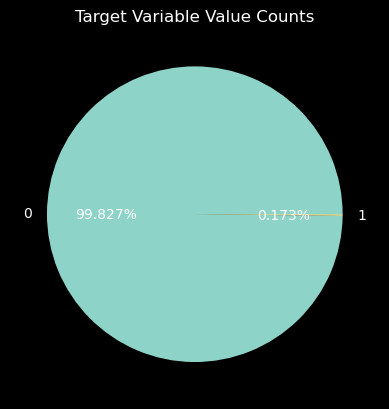

In [15]:
# get the set of distinct classes
labels = df.Class.unique()

# get the count of each class
sizes = df.Class.value_counts().values

# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

As shown above, the Class variable has two values:

0 (the credit card transaction is legitimate)
1 (the credit card transaction is fraudulent)

**Thus, you need to model a binary classification problem. Moreover, the dataset is highly unbalanced, the target variable classes are not represented equally. This case requires special attention when training or when evaluating the quality of a model. One way of handing this case at training time is to bias the model to pay more attention to the samples in the minority class. The models under the current study will be configured to take into account the class weights of the samples at train/fit time.**

**Transition Amount**

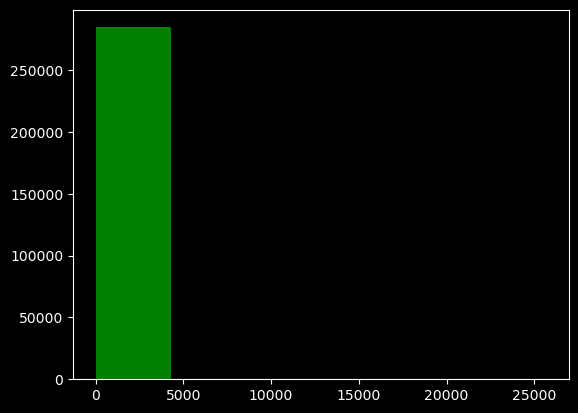

Minimum amount value is  0.0
Maximum amount value is  25691.16
90% of the transactions have an amount less or equal than  203.0


In [16]:
plt.hist(df.Amount.values, 6, histtype='bar', facecolor='g')
plt.show()

print("Minimum amount value is ", np.min(df.Amount.values))
print("Maximum amount value is ", np.max(df.Amount.values))
print("90% of the transactions have an amount less or equal than ", np.percentile(df.Amount.values, 90))

In [18]:
corr = df.corr().abs()
corr.style.background_gradient()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117396,0.010593,0.419618,0.105260,0.173072,0.063016,0.084714,0.036949,0.008660,0.030617,0.247689,0.124348,0.065902,0.098757,0.183453,0.011903,0.073297,0.090438,0.028975,0.050866,0.044736,0.144059,0.051142,0.016182,0.233083,0.041407,0.005135,0.009413,0.010596,0.012323
V1,0.117396,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.227709,0.101347
V2,0.010593,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.531409,0.091289
V3,0.419618,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.210880,0.192961
V4,0.105260,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.098732,0.133447
V5,0.173072,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.386356,0.094974
V6,0.063016,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.215981,0.043643
V7,0.084714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.397311,0.187257
V8,0.036949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.103079,0.019875
V9,0.008660,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044246,0.097733


# Model Training

In [19]:
df.corrwith(df['Class']).abs().sort_values(ascending=False)

Class     1.000000
V17       0.326481
V14       0.302544
V12       0.260593
V10       0.216883
V16       0.196539
V3        0.192961
V7        0.187257
V11       0.154876
V4        0.133447
V18       0.111485
V1        0.101347
V9        0.097733
V5        0.094974
V2        0.091289
V6        0.043643
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
Time      0.012323
V28       0.009536
V24       0.007221
Amount    0.005632
V13       0.004570
V26       0.004455
V15       0.004223
V25       0.003308
V23       0.002685
V22       0.000805
dtype: float64

In [20]:
x = df.drop('Class', axis=1)
y = df['Class']

In [21]:
mm=MinMaxScaler()
Xm=mm.fit_transform(x)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(Xm,y, test_size=0.2, random_state=42)

# Create a Gradient Boosting model

In [23]:
gradient_boosting = GradientBoostingClassifier()

model_gb=gradient_boosting.fit(X_train, y_train)

y_pred = model_gb.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Accuracy: {accuracy:.3f}")

Gradient Boosting Accuracy: 0.999


In [26]:
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.60      0.66        98

    accuracy                           1.00     56962
   macro avg       0.87      0.80      0.83     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9989466661985184


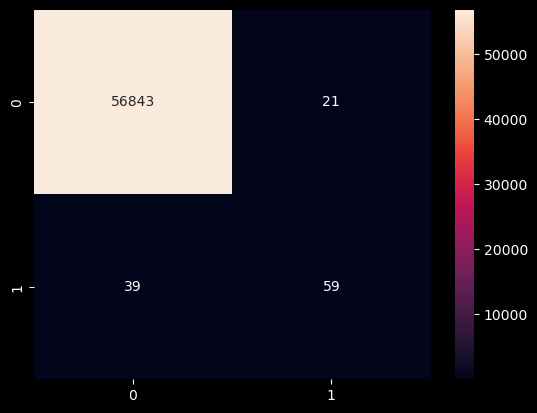

In [25]:
## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

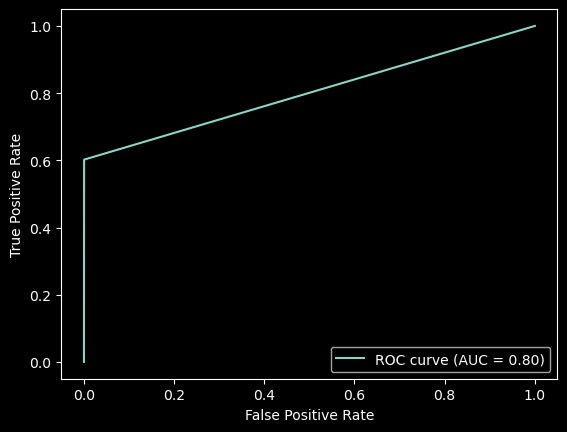

In [27]:
## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# Thank You!